In [1]:
    df = pd.DataFrame({'LWP': np.log(np.float_(y)),'Nd': np.log(np.float_(x))})

    # print(df.AI,df.Nd)
    nx = 30
    ny = 35

    jh, x_mid, y_mid, y_median = get_joint_histgram(nx,ny,np.log(5), np.log(800), np.log(2), np.log(1000),df.Nd,df.LWP)
    print("ha============i", jh[:,0].sum())
    # sigmoid fit (x_mid, ymedian)
    p0 = [max(y_median), np.median(x_mid), np.log(1000), min(y_median)]  # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, x_mid, y_median, p0, method='dogbox')
    x0 = np.linspace(x_mid.min(), x_mid.max(), 800)
    y0 = sigmoid(x0, *popt)


    # definitions for the axes
    left, width = 0.1, 0.85
    bottom, height = 0.3, 0.52
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom - 0.13 - spacing, width-0.17, 0.13]
    # rect_histy = [left + width + spacing, bottom, 0.2, height]

    # set default fontzise for title, x/y label, x/ytick label
    # this part should be put before define fig, ax
    parameters = {'axes.labelsize': 20,
                  'axes.titlesize': 35,
                  'xtick.labelsize':14,
                  'ytick.labelsize':14,
                  }
    plt.rcParams.update(parameters)

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)

    # no labels
    ax.tick_params(axis="x", labelbottom=False)
    # ax_histx.tick_params(axis="y", labelleft=False)
    ax.tick_params(direction='in', top=True, right=True)
    ax_histx.tick_params(direction='in', top=True, right=True)
    #ax.set_ylabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax.set_ylabel('LWP (gm$\mathregular{^{-2}}$)')

    ax.set_yticks(np.log(np.array([2, 10, 50, 300, 1000])))
    ax.set_yticklabels(['2', '10', '50', '300', '1000'])
    
    ax_histx.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax_histx.set_ylabel('PDF (%)')

    # the contour plot:
    # X, Y = np.meshgrid(x_bins[:-1]+(x_bins[1]-x_bins[0])/2, dict_jh['x'])
    print("+++++print contourf x,y,jh", np.shape(x_mid), np.shape(y_mid), np.shape(jh))
    cs = ax.contourf(x_mid, y_mid, jh, cmap='jet') #Greys
    #cs = ax.pcolormesh(x_mid, y_mid, jh, cmap='jet') #Greys

    fig.colorbar(cs, ax=ax, label='PDF (%)')

    # the scatter and fitting line plot
    # ax.plot(x_mid, np.array(x_axis)*b+a, color='blue', ls='-', lw=3, label='Pre-binned $\it{S}$$\mathregular{_{AI}}$'+f" = {b:.2f}$\pm$0.078")
    ax.scatter(x_mid, y_median, color='blue', marker='o', s=100)
    ax.plot(x0,y0,color='yellow', label='sigmoid fit', lw=2)


    
    #PDF plot
    dict_PDF = get_PDF_bin_range(df['Nd'], np.linspace(np.log(5), np.log(800), nx+1))
    ax_histx.plot(dict_PDF['x'], dict_PDF['pdf'], color='black', linewidth=3)
    ax_histx.fill_between(dict_PDF['x'], 0, dict_PDF['pdf'], facecolor='w', alpha=0.7, hatch = 'x')

    #Translate ln to linear
    plt.xticks(np.log(np.array([5, 10, 50, 300,800])),np.array([5, 10, 50, 300,800]).astype(str))

    # ax.set_tight_layout(True)
    figure_name = '{}/relation_LWP-Nd-density-H.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    # plt.show()
    

NameError: name 'pd' is not defined

In [ ]:

    
    
    parser = argparse.ArgumentParser()
    arg = parser.add_argument
    arg('--path-ICON', type=str, default='/home/jvillarreal/Documents/phd/dataset/data_rttov_T12.nc', help='path of the dataset is the ICON simulations')
#     arg('--path-OUTPUT-RTTOV', type=str, default='/home/jvillarreal/Documents/phd/github/output-rttov/VF-output-test-modis-T12.nc', help='path of the dataset the output of RTTOV')
    arg('--path-OUTPUT-RTTOV', type=str, default='/home/jvillarreal/Documents/phd/github/output-rttov/output-test-2-modis.nc', help='path of the dataset the output of RTTOV')

    arg('--path-output', type=str, default='/home/jvillarreal/Documents/phd/output', help='path of the output data is')

    args = parser.parse_args()

    path_ICON = args.path_ICON
    path_OUTPUT_RTTOV = args.path_OUTPUT_RTTOV 
    path_output=args.path_output
    
    #plot_input_ICON(path_output=path_output,variable="lwp",path_ICON=path_ICON)
#     output_RTTOV(path_output=path_output,variable='brdf',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV)
#     output_RTTOV(path_output=path_output,variable='Y',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV)

    # output_RTTOV(path_output=path_output,variable='brdf',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV,input_data="ex_data")
    # output_RTTOV(path_output=path_output,variable='Y',path_OUTPUT_RTTOV=path_OUTPUT_RTTOV,input_data="ex_data")
    
    p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height = lwp_nd_input_ICON(path_output = path_output,  path_ICON = path_ICON)
    # max_cdnc_2013_cm, lwp_2013, lat, lon 
    





#     sys.stdout.close()
  # Plot histogram using pcolormesh

#     plt.imshow(max_cdnc_2013_cm[9:,:])
#     plt.title("max_cdnc_2013_cm")

#     plt.show()

#     plt.imshow(lwp_2013_gm2[9:,:])
#     plt.title("lwp_2013_gm2")

#     plt.show()

    # Creating dataset
    x =  max_cdnc_2013_cm.flatten() #np.random.normal(size = 500000) 
    y =  lwp_2013.flatten() #x * 3 + 4 * np.random.normal(size = 500000) #
    
    


#     fig, ax = plt.subplots(figsize =(10, 7))
#     # Creating plot
#     plt.title("Using matplotlib hexbin function")
#     plt.hexbin(x, y, bins = 2)

#     ax.set_xlabel('Nd (cm−3)') 
#     ax.set_ylabel('LWP (gm−2)') 

#     # show plot
#     plt.tight_layout() 
#     plt.show()

#     # Generate non-symmetric test data

#     # Compute 2d histogram. Note the order of x/y and xedges/yedges

#     H, yedges, xedges = np.histogram2d(y, x, bins=2)
# # Plot histogram using pcolormesh

#     fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
#     ax1.pcolormesh(xedges, yedges, H, cmap='rainbow')
#     ax1.plot(x, 2*np.log(x), 'k-')
#     ax1.set_xlim(x.min(), x.max())
#     ax1.set_ylim(y.min(), y.max())
#     ax1.set_xlabel('x')
#     ax1.set_ylabel('y')
#     ax1.set_title('histogram2d')
#     ax1.grid()
    
#     # Create hexbin plot for comparison

#     ax2.hexbin(x, y, gridsize=2, cmap='rainbow')
#     ax2.plot(x, 2*np.log(x), 'k-')
#     ax2.set_title('hexbin')
#     ax2.set_xlim(x.min(), x.max())
#     ax2.set_xlabel('x')
#     ax2.grid()
#     #plt.show()


#     print('=================lwd',np.max(y), np.min(y))
#     unique, counts = np.unique(y, return_counts=True)
#     pprint.pprint(np.asarray((unique, counts)).T)
    
#     df_y=pd.DataFrame(y) 
#     pd.set_option('display.float_format', lambda x: '%.1f' % x)
#     df_y.describe().to_csv( "LWP.csv")
    
#     print("ok dataframe lwp")
    
#     print('=================n',np.max(x), np.min(x))
#     unique, counts = np.unique(x, return_counts=True)
#     pprint.pprint  (np.asarray((unique, counts)).T)
#     df_x=pd.DataFrame(x) 
#     pd.set_option('display.float_format', lambda x: '%.1f' % x)
#     df_x.describe().to_csv( "Nd.csv")
    
#     df_x.describe()
#     print("ok dataframe Nd")
    
    #n, bins, patches = plt.hist(y,bins=30)
    #print(n, bins, patches)
    #plt.show()
    fig = plt.figure(figsize=(12, 12))
    (ax0, ax1), (ax3, ax4)  = fig.subplots(nrows=2, ncols=2 )
    ax0.hist(y,density=True,label="Sample",bins =10,range=(0, 1000))
    ax0.set_ylabel("Density")
    ax0.set_title('LWP')

    ax1.hist(y,density=True,label="Sample",bins =10,range=(0, 800))
    ax1.set_ylabel("Density")
    ax1.set_title('Nd')


    #n, bins, patches = plt.hist(x,bins=40)
    #print(n, bins, patches)
   # plt.show()
    # plt.plot(x, norm.pdf(x))
    # plt.show()
    
    nx = 30
    ny = 35
    
    h,xedges, yedges, image = ax3.hist2d(np.log(x), np.log(y), bins=[nx,ny], range=[[np.log(5), np.log(800)], [np.log(5), np.log(1000)]])
    xedges_mid, yedges_mid = get_values_joint_hist(xedges, yedges)
        
    ##############################falta lo siguiente######
#     avg_cdcs_mk_T = np.zeros((20,20))
#     avg_lwps_mk_T = np.zeros((20,20))

#     for l in range(20):  
#         x_filter = [i for i in x if i >= np.exp(xedges[l]) and i <= np.exp(xedges[l+1])]
#         filter(between(x, np.exp(xedges_mid[l]), np.exp(xedges_mid[l+1])) )
# #         tmp_T = data_modis_DT %>% filter(between(x, np.exp(xedges[l]), np.exp(xedges[l+1])) ) %>% select(x, y)
# #         avg_cdcs_mk_T[l]  = np.mean(tmp_T$x)
# #         avg_lwps_mk_T[l]  = np.mean(tmp_T$y)    
    ###########

   
    #h2d_2013 = 2d,1d,1d,QuadMesh
    print('++++++++output of the hist2d:', np.shape(h), np.shape(xedges), np.shape(yedges),np.shape(image))
    ax3.set_ylabel("LWP (gm-2)")
    ax3.set_xlabel("Nd (cm-3)")

    ax3.set_title('LWP-ND')

    ax3.set_xticks(np.log(np.array([5, 10, 50, 300, 800])))
    ax3.set_xticklabels(['5', '10', '50', '300', '800'])

    ax3.set_yticks(np.log(np.array([5, 10, 50, 300, 1000])))
    ax3.set_yticklabels(['5', '10', '50', '300', '1000'])
    
    
    cps_2013 = np.zeros(np.shape(h))
    print(np.shape(cps_2013))
                                                                                                                                               
    for x in range(nx):                                                                                                                                                                                                 
        sum_cs_2013= np.sum(h[x,:])                                                                                                                                                                        
        cps_2013 [x,:] =(h[x,:])/sum_cs_2013                                                                                                                                                              
      # scale_fill_gradientn(colours = pal(100), limits=c(0,22), breaks=c(0,5,10,15,20), name="CP(%)") +
    print('pcoclorsj333',np.shape(xedges_mid), np.shape(yedges_mid), np.shape(h))
    # ax4.pcolormesh(xedges_mid, yedges_mid, h.T, cmap ='jet') #cmap=cmap.N, norm=norm)
    # ax4.contourf(xedges_mid, yedges_mid, h.T, cmap ='jet') #cmap=cmap.N, norm=norm)
    # ax4.contourf(xedges_mid, yedges_mid, cps_2013.T, cmap ='jet') #cmap=cmap.N, norm=norm) ##eestree ulyimo
    # ax4.contourf(cps_2013.T, cmap ='jet') #cmap=cmap.N, norm=norm) ##eestree ulyimo
    ###################mk##################################

    cps_mk_new_T = np.zeros((nx,ny))
    lwp_dfs_mk_T = np.zeros((nx*ny)) 
    cdc_dfs_mk_T = np.zeros((nx*ny)) 
    cps_dfs_mk_T = np.zeros((nx*ny)) 


#########
    m=0    
    for j in range(ny):
        for i in range(nx):
            if(not(np.isnan(cps_2013[i,j])) and (cps_2013[i,j]*100 > ny)):
                cps_mk_new_T[i,j] = ny+2
            elif(not(np.isnan(cps_2013[i,j])) and (cps_2013[i,j]*100 < 1)):
                cps_mk_new_T[i,j] = 0
            else:
                cps_mk_new_T[i,j] = cps_2013[i,j]*100
                   
            if((np.isnan(cps_mk_new_T[i,j]))):
                 cps_mk_new_T[i,j] = 0.0
             
            cps_dfs_mk_T[m] = cps_mk_new_T[i,j]
            cdc_dfs_mk_T[m] = xedges_mid[i]
            lwp_dfs_mk_T[m] = yedges_mid[j]

            m=m+1
    print("=========values_edge x,y,cps", np.shape(xedges_mid), np.shape(yedges_mid), np.shape(cps_mk_new_T) )
    # spl = UnivariateSpline(np.exp(xedges), avg_lwps_mk_T)
    # ax4.plot(xedges, spl(xs), 'b', lw=3)
    
    
    # cs = ax.contourf(x_mid, y_mid, jh, cmap='jet') #Greys

#     # c = ax4.pcolormesh(np.exp(yedges_mid),np.exp(xedges_mid),  cps_mk_new_T, cmap ='jet') #cmap=cmap.N, norm=norm)


    
    c = ax4.contourf(xedges_mid,yedges_mid, cps_mk_new_T.T, cmap='jet') #Greys #np.exp(xedges_mid),np.exp(yedges_mid), 

    # ax4.set_xticks(np.log(np.array([5, 10, 50, 300, 800])))
    # ax4.set_xticklabels(['5', '10', '50', '300', '800'])

    # ax4.set_yticks(np.log(np.array([5, 10, 50, 300, 1000])))

    # cbar = fig.colorbar(c, ax=ax4,label= "CP(%)", pad="5%", ticks=[0,5,10,15,22]) 
    fig.colorbar(c, ax=ax4, label='CP (%)', ticks=[0,5,10,15,25])
    

    #location="right",pad="5%",,,shrink=0.75,
    ax4.set_title('LWP- Nd (02 May 2013)')
    ax4.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)') #, labelpad=14,fontsize=14)
    ax4.set_ylabel('LWP (gm$\mathregular{^{-2}}$)') #, labelpad=14,fontsize=14)
    

    
    
    # ax3.xticks(np.log(np.array([5, 10, 50, 300,1000])),np.array([5, 10, 50, 300,1000]).astype(str))

    # # Show all ticks and label them with the respective list entries
    # ax.set_xticks(np.arange(len(farmers)), labels=farmers)
    # ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)


    
    #ax3.set_xticks(np.log(np.array([5, 10, 50, 300,1000])), ['5', '10', '50', '300','1000'])
    #ax3.set_yticks([np.log(np.array([2, 10, 50, 300,800]))],['2', '10', '50', '300','800'])

    ################Condition Probability############# 
    # cps_2013 = np.array((20,20))                                                                                                                                                                                         
    #   for(i in 1:20):                                                                                                                                                                                                 
    #     sum_cs_2013=sum(h2d_2013$counts[i,])                                                                                                                                                                            
    #     cps_2013[i,]=(h2d_2013$counts[i,])/sum_cs_2013                                                                                                                                                                  


    plt.tight_layout()
    figure_name = '{}/relation_LWP-Nd.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()   
    
    ###############################################################################################
    

###$$$$$$$$$$$$$$$$$$$$$$$$hhhhh$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
      # definitions for the axes
    left, width = 0.1, 0.85
    bottom, height = 0.3, 0.52
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom - 0.13 - spacing, width-0.17, 0.13]
   
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)

        # no labels
    ax.tick_params(axis="x", labelbottom=False)
    # ax_histx.tick_params(axis="y", labelleft=False)
    ax.tick_params(direction='in', top=True, right=True)
    ax_histx.tick_params(direction='in', top=True, right=True)
    #ax.set_ylabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    
    cs = ax.contourf(xedges_mid,yedges_mid, cps_mk_new_T.T, cmap='jet') #Greys #np.exp(xedges_mid),np.exp(yedges_mid), 

    df = pd.DataFrame({'LWP': np.log(np.float_(y)),'Nd': np.log(np.float_(x))})

    # print(df.AI,df.Nd)
    nx = 30
    ny = 35
    
    fig.colorbar(cs, ax=ax, label='PDF (%)')
    ax.set_ylabel('LWP (gm$\mathregular{^{-2}}$)')
    ax.set_yticks(np.log(np.array([2, 10, 50, 300, 1000])))
    ax.set_yticklabels(['2', '10', '50', '300', '1000'])
    
    dict_PDF = get_PDF_bin_range(df['Nd'], np.linspace(np.log(5), np.log(800), nx+1))
    ax_histx.plot(dict_PDF['x'], dict_PDF['pdf'], color='black', linewidth=3)
    ax_histx.fill_between(dict_PDF['x'], 0, dict_PDF['pdf'], facecolor='w', alpha=0.7, hatch = 'x')

    plt.xticks(np.log(np.array([5, 10, 50, 300,800])),np.array([5, 10, 50, 300,800]).astype(str))

    
    ax_histx.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax_histx.set_ylabel('PDF (%)')

    
    
    plt.tight_layout()
    figure_name = '{}/relation_LWP-Nd-density-me.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()                
###$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$hhhhh$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
        



    # jh, x_mid, y_mid, y_median = get_joint_histgram(nx = 20 , ny = 20, xmin = np.log(150), xmax = np.log(1000), ymin = np.log(5), ymax = np.log(1000), x =x, y=y)
   

#     fig = plt.figure(figsize=(8, 8))
#     ax = fig.add_subplot(111)

#     ax.set_xlabel('Nd')
#     ax.set_ylabel('LWP')
#     cs = ax.contourf(x_mid, y_mid, jh, cmap='Greys')
#     fig.colorbar(cs, ax=ax, label='PDF (%)')
#     plt.show()
    ###############################################################################################
    
    df = pd.DataFrame({'LWP': np.log(np.float_(y)),'Nd': np.log(np.float_(x))})
    jh, x_mid, y_mid, y_median = get_joint_histgram(nx,ny,np.log(5), np.log(800), np.log(2), np.log(1000),df.Nd,df.LWP)
    print("ha============i", jh[:,0].sum())
    # sigmoid fit (x_mid, ymedian)
    p0 = [max(y_median), np.median(x_mid), np.log(1000), min(y_median)]  # this is an mandatory initial guess
    popt, pcov = curve_fit(sigmoid, x_mid, y_median, p0, method='dogbox')
    x0 = np.linspace(x_mid.min(), x_mid.max(), 800)
    y0 = sigmoid(x0, *popt)


    # definitions for the axes
    left, width = 0.1, 0.85
    bottom, height = 0.3, 0.52
    spacing = 0.005

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom - 0.13 - spacing, width-0.17, 0.13]
    # rect_histy = [left + width + spacing, bottom, 0.2, height]

    # set default fontzise for title, x/y label, x/ytick label
    # this part should be put before define fig, ax
    parameters = {'axes.labelsize': 20,
                  'axes.titlesize': 35,
                  'xtick.labelsize':14,
                  'ytick.labelsize':14,
                  }
    plt.rcParams.update(parameters)

    # start with a square Figure
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_axes(rect_scatter)
    ax_histx = fig.add_axes(rect_histx, sharex=ax)

    # no labels
    ax.tick_params(axis="x", labelbottom=False)
    # ax_histx.tick_params(axis="y", labelleft=False)
    ax.tick_params(direction='in', top=True, right=True)
    ax_histx.tick_params(direction='in', top=True, right=True)
    #ax.set_ylabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax.set_ylabel('LWP (gm$\mathregular{^{-2}}$)')  

    ax.set_yticks(np.log(np.array([2, 10, 50, 300, 1000])))
    ax.set_yticklabels(['2', '10', '50', '300', '1000'])
    
    ax_histx.set_xlabel('$\it{N}$$\mathregular{_d}$ (cm$\mathregular{^{-3}}$)')
    ax_histx.set_ylabel('PDF (%)')

    # the contour plot:
    # X, Y = np.meshgrid(x_bins[:-1]+(x_bins[1]-x_bins[0])/2, dict_jh['x'])
    print("+++++print contourf x,y,jh", np.shape(x_mid), np.shape(y_mid), np.shape(jh))
    cs = ax.contourf(x_mid, y_mid, jh, cmap='jet') #Greys
    #cs = ax.pcolormesh(x_mid, y_mid, jh, cmap='jet') #Greys

    fig.colorbar(cs, ax=ax, label='PDF (%)')

    # the scatter and fitting line plot
    # ax.plot(x_mid, np.array(x_axis)*b+a, color='blue', ls='-', lw=3, label='Pre-binned $\it{S}$$\mathregular{_{AI}}$'+f" = {b:.2f}$\pm$0.078")
    ax.scatter(x_mid, y_median, color='blue', marker='o', s=100)
    ax.plot(x0,y0,color='yellow', label='sigmoid fit', lw=2)


    
    #PDF plot
    dict_PDF = get_PDF_bin_range(df['Nd'], np.linspace(np.log(5), np.log(800), nx+1))
    ax_histx.plot(dict_PDF['x'], dict_PDF['pdf'], color='black', linewidth=3)
    ax_histx.fill_between(dict_PDF['x'], 0, dict_PDF['pdf'], facecolor='w', alpha=0.7, hatch = 'x')

    #Translate ln to linear
    plt.xticks(np.log(np.array([5, 10, 50, 300,800])),np.array([5, 10, 50, 300,800]).astype(str))

    # ax.set_tight_layout(True)
    figure_name = '{}/relation_LWP-Nd-density-H.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    # plt.show()
    

# HERE

### plot

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import argparse
import pandas as pd
from eofs.xarray import Eof
from sklearn import preprocessing
from sklearn.decomposition import PCA

from lwp_nd import lwp_nd_input_ICON
from PCA_radiances import PCA_calculation, variance_sklearn_plot, dataframe_csv, convert_3D

from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, check_scoring, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


def get_rmse_array(truth, pred):
    print(truth.shape, pred.shape)
    weights = np.cos(np.deg2rad(truth.lat))

    return np.sqrt(((truth - pred.reshape(-1, 96,144))**2).weighted(weights).mean(['lat', 'lon'])).data.mean()


def get_training_inputs(path_output, path_ICON):
    
    ds, p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height= lwp_nd_input_ICON(path_output = path_output, path_ICON = path_ICON) #obtain more outputs of it

    # call pca, new to run it again and kmwasn but also adapt inputs array of inputs, array of outpus, usig of reference code of clibenc
    # train_files = [ "T09", "T12" ]
    # train_inputs_variables_1d = [ 'height','lat', 'lon']
    # train_inputs_variables_2d = [ "t2m", 'q2m', 'p_surf', 'u_surf', 'v_surf', 't_skin', 'h_surf', 'lat', 'lon', 'qnc', 'lwp']
    # train_inputs_variables_3d = [ "p", "t", "q", 'tca', 'lwc', 'iwc']
    
    train_inputs_variables_2D = ['qnc_max', 'lwp'] #(lat, lon)
    train_inputs_variables_3D = { "pres": p_2013, "ta": T_2013, "hus":q_2013} #(height, lat, lon)
    n_pca_variables_3D = { "pres": 5, "ta": 10, "hus":24} #(height, lat, lon)

    print('==== variables 2D', np.shape(max_cdnc_2013_cm))
    print('--after flat', np.shape(max_cdnc_2013_cm.flatten()))


    print("==========Nan values=====================\n")


    
    df = pd.DataFrame({  #falta normalizar
        "qnc_max" : max_cdnc_2013_cm.flatten(),
        "lwp": lwp_2013.flatten()
    }) #0,1,2,3,....row,row,row,

    count_nan_in_df = pd.DataFrame(df).isnull().sum()
    print (count_nan_in_df)  #can i used 0 in the lwp and nd?
    df = df.fillna(0)

        
        
    scaler_2D = preprocessing.StandardScaler()# Fit on training set only.
    scaler_2D.fit(df)

    training_input_variables_df = pd.DataFrame(scaler_2D.transform(df), columns = ["qnc_max", "lwp"]) 

    # Combine with aerosol EOFs
    scaler_3D = []
    pca_3D = []

    for key, var in train_inputs_variables_3D.items():  
        var = var.transpose(1,2,0)
        var_df = pd.DataFrame(var.reshape(-1, var.shape[2]))
        var_df.columns = [f"{key}_{i}" for i in range(var.shape[2])]
        # scaler = preprocessing.StandardScaler().fit(var_df) 
        scaler = preprocessing.StandardScaler()# Fit on training set only.        
        scaler_3D.append(scaler)

        scaler.fit(var_df)
        var_scaled = scaler.transform(var_df)
        
        
        n_pca = n_pca_variables_3D[key] #150
        name_plot= "{}_PCA_variance_{}_variable".format(n_pca, key)
        PC, X_pca, pca = PCA_calculation(var_scaled, name_plot,n_pca, path_output)
        pca_3D.append(pca)
        print( 'Original shape: {}'.format(str(PC.shape)))
        print( 'Original shape: {}'.format(str(X_pca.shape)))
        print( 'Reduced shape: {}'.format(str(X_pca.shape)))
        principalDf = pd.DataFrame(data = X_pca
             , columns = [f"{key}_PCA_{i}" for i in range(n_pca)])
        training_input_variables_df=pd.concat([training_input_variables_df, principalDf], axis=1)



        # training_input_variables_df=pd.concat([training_input_variables_df, var_df], axis=1)



    # for key, var in train_inputs_variables_3D.items():  
    #     var = var.transpose(1,2,0)
    #     var_df = pd.DataFrame(var.reshape(-1, var.shape[2]))
    #     var_df.columns = [f"{key}_{i}" for i in range(var.shape[2])]
    #     training_input_variables_df=pd.concat([training_input_variables_df, var_df], axis=1)



    training_input_variables_df.describe().to_csv(path_output + "/inputs_description.csv")    
    print("ok dataframe")

    # count_nan 
    count_nan_in_df = training_input_variables_df.isnull().sum()
    print (count_nan_in_df)  #can i used 0 in the lwp and nd?
    
    #X_train_np = np.array([X_train_reshaped['pres'].data, X_train_reshaped['ta'].data, X_train_reshaped['hus'].data, X_train_reshaped['qnc'].data])

    # pd.set_option('display.float_format', lambda x: '%.1f' % x)
    # df.columns= colum
    

    return training_input_variables_df, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D


def from2to3d(x):
    x_3d = np.zeros((6, 628,589)) 

    for i in range(6):
        x_3d[i,:,:] = x[:,i].reshape(-1,589)
        
    return x_3d
  

def test_random_forest(train_x, train_y, test_x, test_y):
    rf_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 
# rf_model = RandomForestRegressor( random_state=0, bootstrap=False, max_features='auto', **{'n_estimators': 200, 'min_samples_split': 100, 'min_samples_leaf': 4,  'max_depth': 1})
    
    rf_pcs = rf_model.fit(train_x, train_y)
    

        
    return rf_pcs


def read_data_refl_emiss_rttov_old(rttov_path_rad, rttov_path_refl_emmis):
    '''
    
    output: refl_emmiss (HxWxCH)
    '''
    rttov_ds_rad = xr.open_dataset(rttov_path_rad).compute()  # write read rttov in a function
    rttov_ds_refl_emmi = xr.open_dataset(rttov_path_refl_emmis).compute()
    rttov_variable = np.zeros((np.shape(rttov_ds_rad['Y'].values)))
    
    
    print("****************variables shape ", np.shape(rttov_ds_refl_emmi['bt_refl_total'].values), np.shape(rttov_variable), np.shape(rttov_ds_rad['Y'].values))

    rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
    rttov_variable[19:25] = rttov_ds_rad['Y'][19:25]
    rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][19] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
    rttov_variable[26:36] = rttov_ds_rad['Y'][26:36]

    rttov_bands =rttov_ds_rad['chan'].values
    print('rttov_variable',np.shape(rttov_variable))
    refl_emmiss =  rttov_variable[:,9:,].transpose(1,2,0)
    
    rttov_ds_rad.close()
    rttov_ds_refl_emmi.close()
    return  refl_emmiss, rttov_bands

### the next should be the last version 
def read_data_refl_emiss_rttov(path_rttov_test):
    '''
    
    output: refl_emmiss (HxWxCH)
    '''
    rttov_ds_refl_emmi = xr.open_dataset(path_rttov_test).compute()
    rttov_variable = np.zeros((np.shape(rttov_ds_refl_emmi['radiances_total'].values)))
    
    
    print("****************variables shape ", np.shape(rttov_ds_refl_emmi['bt_refl_total'].values), np.shape(rttov_variable), np.shape(rttov_ds_refl_emmi['radiances_total'].values))

    rttov_variable[:19] = rttov_ds_refl_emmi['bt_refl_total'][:19] #refl 1-19, 26 rad 20-25 and 27-36
    rttov_variable[19:25] = rttov_ds_refl_emmi['radiances_total'][19:25]
    rttov_variable[25] = rttov_ds_refl_emmi['bt_refl_total'][25] #solo tengo en este archivo 1-19,26 luego tengo q hacer todo esto en un solo file
    rttov_variable[26:36] = rttov_ds_refl_emmi['radiances_total'][26:36]

    rttov_bands =rttov_ds_refl_emmi['chan'].values
    print('rttov_variable',np.shape(rttov_variable))
    refl_emmiss =  rttov_variable[:,9:,].transpose(1,2,0)
    
    rttov_ds_refl_emmi.close()
    return  refl_emmiss, rttov_bands
    
    

def read_input_target(rttov_path_rad, rttov_path_refl_emmis, path_output):
    '''
    PC_output (latxlon, number_pcs)
    '''

    refl_emmiss, rttov_bands = read_data_refl_emiss_rttov_old(rttov_path_rad, rttov_path_refl_emmis)

    ###### flat ###########################
    name_file = 'refl_emiss'
    df = dataframe_csv(variable = refl_emmiss, colum = rttov_bands, path_output = path_output, name_file = name_file)
    ###### standard scaler ###########################\
    scaler = preprocessing.StandardScaler().fit(df)  #Standardize features by removing the mean and scaling to unit variance
    X_scaled = scaler.transform(df)
    ###### analysis  PCA###########################
    name_plot= "PCA_variance_refl_emiss"
    n_pca = 6 #2 #test JQ 
    n_bands = len(rttov_bands) #2 #test JQ     
    PC_output_all, X_reduced_output, pca = PCA_calculation(X_scaled,name_plot,n_pca, path_output)

    principalDf = pd.DataFrame(data = X_reduced_output
             , columns = [f"PCA_{i}" for i in range(np.shape(X_reduced_output)[1])])
        
        
    return scaler, principalDf, pca
    
def get_test_input(path_output, path_ICON_test, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D):
    '''
    PC_output (latxlon, number_pcs)
    '''
    ds, p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height= lwp_nd_input_ICON(path_output = path_output, path_ICON = path_ICON_test) #obtain more outputs of it

    train_inputs_variables_3D = { "pres": p_2013, "ta": T_2013, "hus":q_2013} #(height, lat, lon)

#     whereAreNaNs = np.isnan(max_cdnc_2013_cm)
#     max_cdnc_2013_cm[whereAreNaNs] = 0
#     whereAreNaNs = np.isnan(lwp_2013)
#     lwp_2013[whereAreNaNs] = 0
    

    df = pd.DataFrame({  #falta normalizar
        "qnc_max" : max_cdnc_2013_cm.flatten(),
        "lwp": lwp_2013.flatten()
    }) #0,1,2,3,....row,row,row,

    df = df.fillna(0)

        
    test_df= scaler_2D.transform(df)        

    testing_input_variables_df = pd.DataFrame(test_df, columns = ["qnc_max", "lwp"]) 

    # Combine with aerosol EOFs
    i = 0
    for key, var in train_inputs_variables_3D.items():  
        var = var.transpose(1,2,0)
        var_df = pd.DataFrame(var.reshape(-1, var.shape[2]))
        var_df.columns = [f"{key}_{i}" for i in range(var.shape[2])]
        
        test_df= scaler_3D[i].transform(var_df)        
        principalDf = pd.DataFrame(data = pca_3D[i].transform(test_df)
             , columns = [f"{key}_PCA_{i}" for i in range(n_pca_variables_3D[key])])
        testing_input_variables_df=pd.concat([testing_input_variables_df, principalDf], axis=1)
 


        i+=1
        
    return testing_input_variables_df

def get_test_output(path_rttov_test, path_output, scaler, pca):
    
    y_test, rttov_bands = read_data_refl_emiss_rttov(path_rttov_test)
    ###### flat ###########################
    name_file = 'refl_emiss_test'
    df = dataframe_csv(variable = y_test, colum = rttov_bands, path_output = path_output, name_file = name_file)
    
    
    test_df= scaler.transform(df)
    test_df = pca.transform(test_df)
    
    return test_df
    
def plot_target_prediction(target, prediction, path_output, name_plot):
    n_img = len(target)
    fig = plt.figure(figsize=(5 * n_img, 5 * 2 ))  #WxH
    
    fig.suptitle("Comparation between target and prediction")

    for i in range(n_img):

        # Emulator
        axes = plt.subplot(2,n_img, i + 1)
        ctr = axes.pcolormesh(prediction[i])
        # ctr = axes.pcolormesh(predicted_input)
        axes.set_title(f"Prediction PC_{i}")
        plt.colorbar(ctr)
        
        # Target
        axes0 = plt.subplot(2,n_img, i + 1 + n_img)
        ctr = axes0.pcolormesh(target[i])
        # ctr = axes0.pcolormesh(target)
        axes0.set_title(f"Target PC_{i}")
        plt.colorbar(ctr)
    plt.tight_layout()
        
        
    figure_name = '{}/{}.png'.format(path_output, name_plot) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()   
    

def permutation_test(X_test, pr_truth, rf_pr):
    #%%time
    pr_result = permutation_importance(
        # rf_pr.model.model, X_test, pr_truth, n_repeats=10, random_state=42, n_jobs=1, scoring=make_scorer(get_rmse_array))
        rf_pr.model.model, X_test, pr_truth, n_repeats=10, random_state=42, n_jobs=1)

    importances = rf_pr.model.model.feature_importances_
    feature_names = list(X_test.columns)
    
    std = np.std([tree.feature_importances_ for tree in rf_pr.model.model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("PC0")
    ax.set_ylabel("Feature importances")
    fig.tight_layout()
            
    figure_name = '{}/Feature importances.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()   
        

ModuleNotFoundError: No module named 'pyhdf'

In [3]:
path_ICON = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T12.nc"
path_output = "/home/jvillarreal/Documents/phd/output/ML_output"
path_OUTPUT_RTTOV = "/home/jvillarreal/Documents/phd/github/output-rttov/output-test-2-modis.nc"
rttov_path_refl_emmis = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to19-26-T12.nc"
rttov_path_rad = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-13-data-icon-1-to-36-not-flip.nc"
path_rttov_test = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to36-T09.nc"
path_ICON_test = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T09.nc"



In [ ]:
# ds, p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height= lwp_nd_input_ICON(path_output = path_output, path_ICON = path_ICON) #obtain more outputs of it


In [ ]:
# ds

In [ ]:
# ds.to_dataframe()

In [7]:
ds.close()

NameError: name 'ds' is not defined

In [3]:
train_x_df, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D = get_training_inputs(path_output,path_ICON)


<xarray.Dataset>
Dimensions:       (lat: 637, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.5 47.51 47.52 47.53 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/21)
    FR_LAND       (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    cct           (lat, lon) float32 0.0 0.0 0.0 0.0 ... -999.0 7.681e+04 0.0
    clc           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cli           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clw           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clwvi         (lat, lon) float32 0.0 8.124e-06 8.124e-06 ... 0.01018 0.04625
    ...            ...
    tas           (lat, lon) float32 289.8 289.9 289.9 ... 279.3 279.4 279.3
    topography_c  (lat, lon) float32 411.2 411.7 411.7 393.6 ... 0.0 0.0 0.

/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:75: RuntimeWarning: overflow encountered in exp
  esat_2013 = (0.611* np.exp(17.3*T_c))/(T_c+237.3)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:77: RuntimeWarning: overflow encountered in multiply
  esat_2013 = esat_2013*1000.0
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:80: RuntimeWarning: divide by zero encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:80: RuntimeWarning: overflow encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:80: RuntimeWarning: overflow encountered in multiply
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:81: RuntimeWarning: invalid value encountered in multiply
  pv_2013 = (esat_2013*RH_2013)/100.0
/home/jvillarreal/Documents/ph

max and min cdnc nan nan
1 (150, 628, 589) (628, 589) (628, 589)
2 (55483800,) (369892,) (369892,)
nan debe ser igual to 0.6855309375
------------
 [           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            na

/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, cmap ='jet', vmin=vmin, vmax = vmax ) #cmap=cmap.N, norm=norm)


===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 ==  276.40933
===============T_c (height 120, lat 57, lon 227) cm: 3.00115356445315==  3.2593384
===============esat_2013 (height 120, lat 57, lon 227) 758.360598313415 ==  7.819643e+24
===============p_2013 (height 120, lat 57, lon 227)75935.328125 ==  76403.13
===============qs_2013 (height 120, lat 57, lon 227) 0.00621186875461262  ==  6.3659924e+19
===============r_2013 (height 120, lat 57, lon 227) 0.0062973626597643 ==  0.004533605
===============RH_2013 (height 120, lat 57, lon 227) 101.376299283339 ==  7.1216e-21
===============pv_2013 (height 120, lat 57, lon 227) 768.797909793127 ==  556.8837
===============pd_2013 (height 120, lat 57, lon 227) 75166.5302152069 ==  75846.25
===============rho_2013 (height 120, lat 57, lon 227) 0.954250058491486 ==  0.960264
===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 ==  0.0
==== variables 2D (628, 589)
--after flat (369892,)
==========Nan 

ic| cum_var_exp: array([0.705, 0.986, 0.998, 0.998, 0.999, 0.999, 0.999, 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   

 sum of explained variance ratios of the PCs : (5, 0.9989262650659791)
explained variance: [0.705 0.986 0.998 0.999 0.999]
/home/jvillarreal/Documents/phd/output/ML_output/5_PCA_variance_pres_variable.png
Original shape: (369892, 150)
Original shape: (369892, 5)
Reduced shape: (369892, 5)
Eigenvalues:

 [9.740e+01 2.675e+01 5.269e+00 4.543e+00 2.481e+00 1.732e+00 1.451e+00
 1.222e+00 8.986e-01 7.256e-01 6.405e-01 5.897e-01 5.113e-01 4.826e-01
 4.118e-01 3.926e-01 3.830e-01 3.221e-01 3.086e-01 2.836e-01 2.306e-01
 2.091e-01 1.931e-01 1.739e-01 1.596e-01 1.496e-01 1.246e-01 1.051e-01
 1.023e-01 9.726e-02 8.991e-02 8.516e-02 7.614e-02 6.664e-02 6.509e-02
 6.352e-02 5.901e-02 5.219e-02 4.974e-02 4.759e-02 4.578e-02 4.016e-02
 3.826e-02 3.545e-02 3.396e-02 3.376e-02 3.317e-02 3.161e-02 3.078e-02
 2.973e-02 2.750e-02 2.681e-02 2.440e-02 2.371e-02 2.258e-02 2.198e-02
 2.076e-02 1.969e-02 1.882e-02 1.746e-02 1.725e-02 1.641e-02 1.549e-02
 1.431e-02 1.455e-02 1.314e-02 1.295e-02 1.193e-02 1.155

ic| cum_var_exp: array([0.649, 0.828, 0.863, 0.893, 0.91 , 0.921, 0.931, 0.939, 0.945,
                        0.95 , 0.954, 0.958, 0.961, 0.965, 0.967, 0.97 , 0.973, 0.975,
                        0.977, 0.979, 0.98 , 0.982, 0.983, 0.984, 0.985, 0.986, 0.987,
                        0.988, 0.988, 0.989, 0.99 , 0.99 , 0.991, 0.991, 0.991, 0.992,
                        0.992, 0.993, 0.993, 0.993, 0.994, 0.994, 0.994, 0.994, 0.995,
                        0.995, 0.995, 0.995, 0.995, 0.996, 0.996, 0.996, 0.996, 0.996,
                        0.996, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997,
                        0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998,
                        0.998, 0.998, 0.998, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999

 sum of explained variance ratios of the PCs : (10, 0.9498504833261515)
explained variance: [0.649 0.828 0.863 0.893 0.91  0.921 0.931 0.939 0.945 0.95 ]
/home/jvillarreal/Documents/phd/output/ML_output/10_PCA_variance_ta_variable.png
Original shape: (369892, 150)
Original shape: (369892, 10)
Reduced shape: (369892, 10)
Eigenvalues:

 [6.493e+01 1.705e+01 1.271e+01 7.567e+00 5.642e+00 4.508e+00 4.247e+00
 3.439e+00 3.336e+00 2.359e+00 2.268e+00 1.841e+00 1.633e+00 1.442e+00
 1.369e+00 1.222e+00 1.158e+00 1.091e+00 9.995e-01 9.098e-01 7.286e-01
 6.688e-01 6.451e-01 6.114e-01 5.298e-01 4.866e-01 4.661e-01 4.353e-01
 4.055e-01 3.658e-01 3.413e-01 3.240e-01 2.834e-01 2.632e-01 2.128e-01
 2.092e-01 1.952e-01 1.872e-01 1.685e-01 1.634e-01 1.486e-01 1.325e-01
 1.236e-01 1.134e-01 1.096e-01 1.057e-01 9.471e-02 9.342e-02 8.231e-02
 7.993e-02 7.209e-02 7.300e-02 6.722e-02 6.076e-02 5.722e-02 5.479e-02
 5.125e-02 4.806e-02 4.538e-02 4.075e-02 4.178e-02 4.261e-02 3.809e-02
 3.586e-02 3.473e-02 3.3

ic| cum_var_exp: array([0.433, 0.547, 0.631, 0.682, 0.719, 0.749, 0.778, 0.801, 0.823,
                        0.839, 0.854, 0.866, 0.877, 0.887, 0.896, 0.904, 0.911, 0.919,
                        0.925, 0.931, 0.936, 0.941, 0.945, 0.949, 0.953, 0.956, 0.959,
                        0.962, 0.965, 0.967, 0.969, 0.972, 0.973, 0.975, 0.977, 0.978,
                        0.979, 0.981, 0.982, 0.983, 0.984, 0.985, 0.985, 0.986, 0.987,
                        0.988, 0.988, 0.989, 0.989, 0.99 , 0.99 , 0.991, 0.991, 0.992,
                        0.992, 0.993, 0.993, 0.993, 0.994, 0.994, 0.994, 0.994, 0.995,
                        0.995, 0.995, 0.995, 0.996, 0.996, 0.996, 0.996, 0.996, 0.996,
                        0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.997, 0.998,
                        0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998, 0.998,
                        0.998, 0.998, 0.998, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999,
                        0.999, 0.999, 0.999

 sum of explained variance ratios of the PCs : (24, 0.9492737839900135)
explained variance: [0.433 0.547 0.631 0.682 0.719 0.749 0.778 0.801 0.823 0.839 0.854 0.866
 0.877 0.887 0.896 0.904 0.912 0.919 0.926 0.932 0.936 0.941 0.945 0.949]
/home/jvillarreal/Documents/phd/output/ML_output/24_PCA_variance_hus_variable.png
Original shape: (369892, 150)
Original shape: (369892, 24)
Reduced shape: (369892, 24)
ok dataframe
qnc_max       0
lwp           0
pres_PCA_0    0
pres_PCA_1    0
pres_PCA_2    0
pres_PCA_3    0
pres_PCA_4    0
ta_PCA_0      0
ta_PCA_1      0
ta_PCA_2      0
ta_PCA_3      0
ta_PCA_4      0
ta_PCA_5      0
ta_PCA_6      0
ta_PCA_7      0
ta_PCA_8      0
ta_PCA_9      0
hus_PCA_0     0
hus_PCA_1     0
hus_PCA_2     0
hus_PCA_3     0
hus_PCA_4     0
hus_PCA_5     0
hus_PCA_6     0
hus_PCA_7     0
hus_PCA_8     0
hus_PCA_9     0
hus_PCA_10    0
hus_PCA_11    0
hus_PCA_12    0
hus_PCA_13    0
hus_PCA_14    0
hus_PCA_15    0
hus_PCA_16    0
hus_PCA_17    0
hus_PCA_18    0
hus

In [4]:
# train_outputs = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6']

scaler_Y, train_y_df, PCA_Y = read_input_target(rttov_path_rad, rttov_path_refl_emmis, path_output)


test_x_df = get_test_input(path_output, path_ICON_test, scaler_2D, scaler_3D, pca_3D, n_pca_variables_3D)
test_y = get_test_output(path_rttov_test, path_output, scaler_Y, PCA_Y)


count_nan_in_df = train_x_df.isnull().sum()
print ("--------training_input_variables_df-------",count_nan_in_df)  




****************variables shape  (20, 637, 589) (36, 637, 589) (36, 637, 589)
rttov_variable (36, 637, 589)
dataframe (36,) (628, 589, 36)
(369892, 36)
In band 1.0 values NaN: 0
In band 2.0 values NaN: 0
In band 3.0 values NaN: 0
In band 4.0 values NaN: 0
In band 5.0 values NaN: 0
In band 6.0 values NaN: 0
In band 7.0 values NaN: 0
In band 8.0 values NaN: 0
In band 9.0 values NaN: 0
In band 10.0 values NaN: 0
In band 11.0 values NaN: 0
In band 12.0 values NaN: 0
In band 13.0 values NaN: 0
In band 14.0 values NaN: 0
In band 15.0 values NaN: 0
In band 16.0 values NaN: 0
In band 17.0 values NaN: 0
In band 18.0 values NaN: 0
In band 19.0 values NaN: 0
In band 20.0 values NaN: 0
In band 21.0 values NaN: 0
In band 22.0 values NaN: 0
In band 23.0 values NaN: 0
In band 24.0 values NaN: 0
In band 25.0 values NaN: 0
In band 26.0 values NaN: 0
In band 27.0 values NaN: 0
In band 28.0 values NaN: 0
In band 29.0 values NaN: 0
In band 30.0 values NaN: 0
In band 31.0 values NaN: 0
In band 32.0 values 

ic| cum_var_exp: array([0.673, 0.922, 0.952, 0.975, 0.987, 0.992, 0.995, 0.997, 0.998,
                        0.999, 0.999, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
                        1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ])


 sum of explained variance ratios of the PCs : (6, 0.9918035949709216)
explained variance: [0.673 0.922 0.952 0.975 0.987 0.992]
/home/jvillarreal/Documents/phd/output/ML_output/PCA_variance_refl_emiss.png
<xarray.Dataset>
Dimensions:       (lat: 637, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.5 47.51 47.52 47.53 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/21)
    FR_LAND       (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    cct           (lat, lon) float32 0.0 0.0 0.0 0.0 ... 7.503e+04 7.502e+04 0.0
    clc           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cli           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clw           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clwvi         (lat, lon) float32 0.0 0.0 0.

/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:75: RuntimeWarning: overflow encountered in exp
  esat_2013 = (0.611* np.exp(17.3*T_c))/(T_c+237.3)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:77: RuntimeWarning: overflow encountered in multiply
  esat_2013 = esat_2013*1000.0
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:80: RuntimeWarning: divide by zero encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:80: RuntimeWarning: overflow encountered in true_divide
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:80: RuntimeWarning: overflow encountered in multiply
  RH_2013 = 100*(r_2013/qs_2013)
/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:81: RuntimeWarning: invalid value encountered in multiply
  pv_2013 = (esat_2013*RH_2013)/100.0
/home/jvillarreal/Documents/ph

max and min cdnc nan nan
1 (150, 628, 589) (628, 589) (628, 589)
2 (55483800,) (369892,) (369892,)
nan debe ser igual to --
------------
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, cmap ='jet', vmin=vmin, vmax = vmax ) #cmap=cmap.N, norm=norm)


===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 ==  276.37033
===============T_c (height 120, lat 57, lon 227) cm: 3.00115356445315==  3.220337
===============esat_2013 (height 120, lat 57, lon 227) 758.360598313415 ==  3.983164e+24
===============p_2013 (height 120, lat 57, lon 227)75935.328125 ==  76395.13
===============qs_2013 (height 120, lat 57, lon 227) 0.00621186875461262  ==  3.243044e+19
===============r_2013 (height 120, lat 57, lon 227) 0.0062973626597643 ==  0.0049734227
===============RH_2013 (height 120, lat 57, lon 227) 101.376299283339 ==  1.5335662e-20
===============pv_2013 (height 120, lat 57, lon 227) 768.797909793127 ==  610.84454
===============pd_2013 (height 120, lat 57, lon 227) 75166.5302152069 ==  75784.29
===============rho_2013 (height 120, lat 57, lon 227) 0.954250058491486 ==  0.9600416
===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 ==  0.0
****************variables shape  (36, 637, 589) (36, 637, 589)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_x_df, train_y_df, test_size=0.33, random_state=42)

In [6]:


rf_pcs = test_random_forest(train_x = x_train,
                                          train_y = y_train, 
                                          test_x = x_test, 
                                          test_y = y_test)



In [12]:
y_test.max()

PCA_0   19.4
PCA_1   10.1
PCA_2    5.4
PCA_3    5.4
PCA_4    2.5
PCA_5    3.1
dtype: float64

In [13]:
y_train.max()

PCA_0   19.6
PCA_1   10.2
PCA_2    5.4
PCA_3    5.5
PCA_4    2.4
PCA_5    3.1
dtype: float64

In [ ]:
https://rspatial.org/terra/modis/1-introduction.html

In [11]:
from sklearn import metrics
gt =  y_train 
pred = rf_pcs.predict(x_train)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

gt =  y_test 
pred = rf_pcs.predict(x_test)
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(gt, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(gt, pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(gt, pred)))
mape = np.mean(np.abs((gt - pred) / np.abs(gt)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))


Mean Absolute Error (MAE): 0.14844243910429608
Mean Squared Error (MSE): 0.09005488521406546
Root Mean Squared Error (RMSE): 0.30009146141479176
Mean Absolute Percentage Error (MAPE): PCA_0    43.0
PCA_1   204.7
PCA_2   140.7
PCA_3   132.3
PCA_4    72.0
PCA_5    74.8
dtype: float64
Accuracy: PCA_0     57.0
PCA_1   -104.7
PCA_2    -40.7
PCA_3    -32.3
PCA_4     27.9
PCA_5     25.2
dtype: float64
Mean Absolute Error (MAE): 0.4010726220883997
Mean Squared Error (MSE): 0.6430159430437588
Root Mean Squared Error (RMSE): 0.8018827489376229
Mean Absolute Percentage Error (MAPE): PCA_0   135.9
PCA_1   255.8
PCA_2   254.1
PCA_3   301.0
PCA_4   176.6
PCA_5   387.9
dtype: float64
Accuracy: PCA_0    -35.9
PCA_1   -155.8
PCA_2   -154.1
PCA_3   -201.0
PCA_4    -76.5
PCA_5   -287.9
dtype: float64


In [ ]:

# print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
# print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
# print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
# print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
# print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
# print('Max Error:', metrics.max_error(y_true, y_pred))
# print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
# print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
# print('R^2:', metrics.r2_score(y_true, y_pred))
# print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_true, y_pred))
# print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_true, y_pred))


In [ ]:
# https://colab.research.google.com/drive/1laYeqgh_TRyadSK828PAwTOm_E1dMwEw?authuser=1#scrollTo=oe12ZBVfL3RG

In [10]:
y_true = y_train
y_pred = rf_pcs.predict(x_train)

print('R^2:', metrics.r2_score(y_true, y_pred))


R^2: 0.9787883398653281


In [8]:
#####

score = rf_pcs.score(x_train, y_train)

print('score in training:', score)  

#####
score = rf_pcs.score(x_test, y_test)
print('score in testing:', score)




score in training: 0.9787883398653281
score in testing: 0.8482904396076654


In [ ]:
## falta lo siguiente revisar con el verdadero test https://docs.google.com/spreadsheets/d/1H_4P3lj6Ac0aA-RfzVu3vvbOLS3U-sZjNmP4VwxS2vA/edit#gid=0
# https://cnvrg.io/random-forest-regression/
# https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
#gridsearchcv
# https://medium.datadriveninvestor.com/random-forest-regression-9871bc9a25eb

In [19]:
#####
score = rf_pcs.score(x_train, y_train)
print('score in training:', score)  

#####
score = rf_pcs.score(x_test, y_test)
print('score in testing:', score)



score in training: 0.9788294501842092
score in testing: 0.8480998810764296


In [ ]:
# check it to do a GridSearchCV
#For example, you might use MAE, MSE, MASE, RMSE, MAPE, SMAPE, and others.

In [5]:


rf_pcs = test_random_forest(train_x = train_x_df,
                                          train_y = train_y_df, 
                                          test_x = test_x_df, 
                                          test_y = test_y)



In [6]:
#####
score = rf_pcs.score(train_x_df, train_y_df)
print('score in training:', score)  
    
pred_pcs_train = rf_pcs.predict(train_x_df)
predicted_3D_train = from2to3d(pred_pcs_train)

#####
score = rf_pcs.score(test_x_df, test_y)
print('score in testing:', score)

test_pred_pcs = rf_pcs.predict(test_x_df)
predicted_3D = from2to3d(test_pred_pcs)


score in training: 0.9800468319628876
score in testing: 0.35520852113157614


In [ ]:
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

In [ ]:
from sklearn import metrics

y_true = [...] # Your real values / test labels
y_pred = [...] # The predictions from your ML / RF model

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_true, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_true, y_pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_true, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_true, y_pred))
print('Max Error:', metrics.max_error(y_true, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_true, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_true, y_pred))
print('R^2:', metrics.r2_score(y_true, y_pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_true, y_pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_true, y_pred))

In [17]:
print('training')
print( 'x',train_x_df.describe())
print('testimg')
print( 'x',test_x_df.describe())


training
x        qnc_max      lwp  pres_PCA_0  pres_PCA_1  pres_PCA_2  pres_PCA_3  \
count 369892.0 369892.0    369892.0    369892.0    369892.0    369892.0   
mean       0.0      0.0         0.0         0.0        -0.0         0.0   
std        1.0      1.0        10.3         6.5         1.3         0.3   
min       -0.5     -0.5       -17.4       -18.9        -4.8        -1.7   
25%       -0.5     -0.5        -8.8        -4.5        -0.6        -0.2   
50%       -0.5     -0.5        -0.8         0.5         0.2         0.0   
75%       -0.1      0.1         7.0         4.2         0.9         0.2   
max       11.6     50.9        60.3        47.0         8.1         1.7   

       pres_PCA_4  ta_PCA_0  ta_PCA_1  ta_PCA_2  ...  hus_PCA_14  hus_PCA_15  \
count    369892.0  369892.0  369892.0  369892.0  ...    369892.0    369892.0   
mean          0.0      -0.0       0.0      -0.0  ...        -0.0        -0.0   
std           0.3       9.9       5.2       2.3  ...         1.2         

In [8]:
np.shape(test_pred_pcs),np.shape(test_y)

((369892, 6), (369892, 6))

In [13]:
from skimage.metrics import structural_similarity as ssim
def find_ssim_2d(a, b, n_pca):
    for i in range(n_pca):
        (score, diff) = ssim(a[:,i], b[:,i], full=True)
        print("PC_{}: SSIM: {}".format(i+1,score))

print('training ssmi') 
a = train_y_df.to_numpy() # test_pred_pcs #train_y_3D
b = pred_pcs_train #test_y #target_3D
n_pca = len(train_y_3D)
find_ssim_2d(a, b, n_pca)
print('testing ssmi')
a = test_pred_pcs
b = test_y #test_y #target_3D
n_pca = len(train_y_3D)
find_ssim_2d(a, b, n_pca)

training ssmi
PC_1: SSIM: 0.8808391753459215
PC_2: SSIM: 0.8722315108904921
PC_3: SSIM: 0.8766500394124965
PC_4: SSIM: 0.8445466638109083
PC_5: SSIM: 0.9104903339378334
PC_6: SSIM: 0.8877068410642928
testing ssmi
PC_1: SSIM: 0.07888892236587994
PC_2: SSIM: 0.06829662435685431
PC_3: SSIM: 0.11299971896229474
PC_4: SSIM: 0.04145034011055584
PC_5: SSIM: 0.172360033281819
PC_6: SSIM: 0.08795497792441702


In [14]:
def find_ssim_3d(a, b, n_pca):
    for i in range(n_pca):
        (score, diff) = ssim(a[i], b[i], full=True)
        print("PC_{}: SSIM: {}".format(i+1,score))
a = train_y_3D # test_pred_pcs #train_y_3D
b = predicted_3D_train 
print('training ssmi')
find_ssim_3d(a, b, n_pca)

training ssmi
PC_1: SSIM: 0.9369000422479324
PC_2: SSIM: 0.9298077915829385
PC_3: SSIM: 0.9251388892165386
PC_4: SSIM: 0.9062501298248123
PC_5: SSIM: 0.9340849620732253
PC_6: SSIM: 0.9218168873963118


In [43]:

a = target_3D # test_pred_pcs #train_y_3D
b = predicted_3D 
print('testing ssmi')
find_ssim_3d(a, b, n_pca)


testing ssmi
PC_1: SSIM: 0.09466809266696025
PC_2: SSIM: 0.07531889861531456
PC_3: SSIM: 0.09610709392542097
PC_4: SSIM: 0.032551483511310285
PC_5: SSIM: 0.1413206279777716
PC_6: SSIM: 0.071132528116009


In [12]:

train_y_3D = from2to3d(train_y_df.to_numpy())
plot_target_prediction(target = train_y_3D, prediction = predicted_3D_train, path_output = path_output, name_plot = 'target_pred_training')


target_3D = from2to3d(test_y)
plot_target_prediction(target_3D, predicted_3D, path_output, name_plot = 'target_pred_testing')


In [7]:
np.shape(train_y_3D), np.shape(target_3D)

((6, 628, 589), (6, 628, 589))

In [26]:
def permutation_test(X_test, pr_truth, rf_pr):
    #%%time
    pr_result = permutation_importance(
        # rf_pr.model.model, X_test, pr_truth, n_repeats=10, random_state=42, n_jobs=1, scoring=make_scorer(get_rmse_array))
        rf_pr.model.model, X_test, pr_truth, n_repeats=10, random_state=42, n_jobs=1)

    importances = rf_pr.model.model.feature_importances_
    feature_names = list(X_test.columns)
    
    std = np.std([tree.feature_importances_ for tree in rf_pr.model.model.estimators_], axis=0)
    forest_importances = pd.Series(importances, index=feature_names)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=std, ax=ax)
    ax.set_title("PC0")
    ax.set_ylabel("Feature importances")
    fig.tight_layout()
            
    figure_name = '{}/Feature importances.png'.format(path_output) #aca pasarr con todo path
                   
    fig.savefig(figure_name) 
    plt.close()   
    

In [33]:
import time

def permutation_test(x, y, model):

    start_time = time.time()
    result = permutation_importance(model, x, y, n_repeats=10, random_state=0)
    elapsed_time = time.time() - start_time
    print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

    forest_importances = pd.Series(result.importances_mean, index=feature_names)

    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
    ax.set_title("Feature importances using permutation on full model")
    ax.set_ylabel("Mean accuracy decrease")
    fig.tight_layout()
    plt.show()

In [ ]:
permutation_test(x = train_x_df, y = train_y_df, model = rf_pcs)

# permutation_test(X_test = train_x_df, pr_truth = train_y_df.to_numpy(), rf_pr = rf_pcs)
# permutation_test(X_test = test_x_df, pr_truth = test_y[:,0], rf_pr = rf_pcs[:,0])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

RGB (628, 589, 3)
255
0.99609375


/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


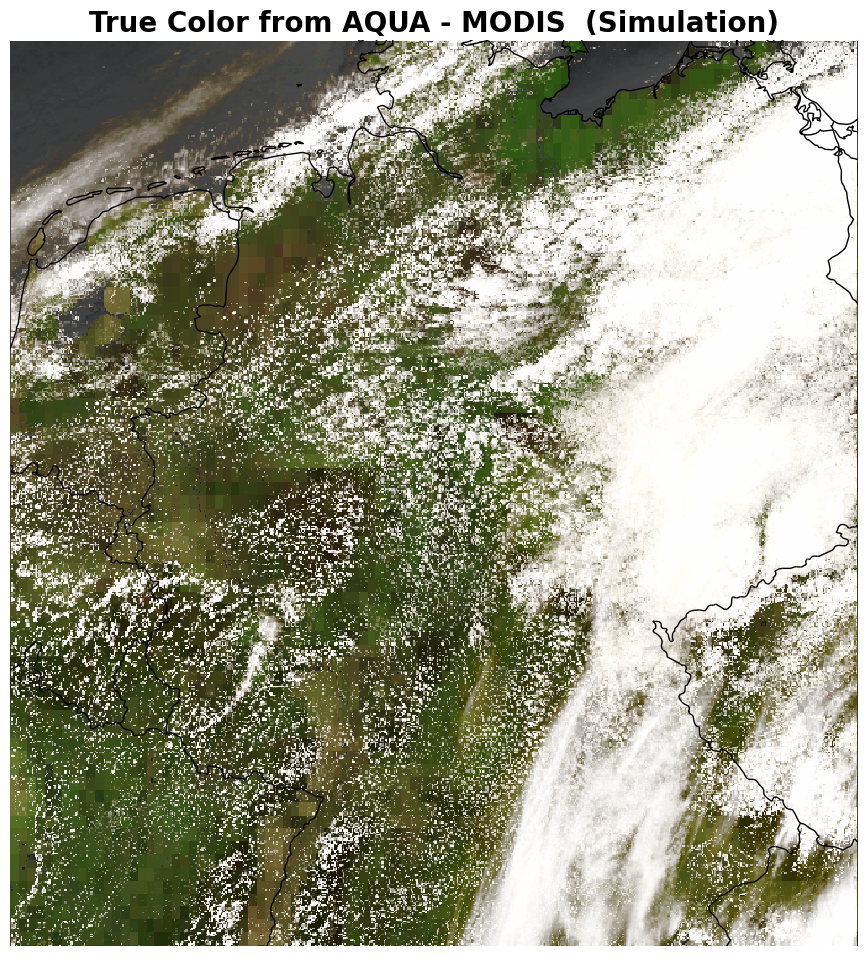

In [16]:
def bytescale(data, cmin=None, cmax=None, high=255, low=0):
    """
    Byte scales an array (image).

    Byte scaling means converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255).
    If the input image already has dtype uint8, no scaling is done.

    Parameters
    ----------
    data : ndarray
        PIL image data array.
    cmin : scalar, optional
        Bias scaling of small values. Default is ``data.min()``.
    cmax : scalar, optional
        Bias scaling of large values. Default is ``data.max()``.
    high : scalar, optional
        Scale max value to `high`.  Default is 255.
    low : scalar, optional
        Scale min value to `low`.  Default is 0.

    Returns
    -------
    img_array : uint8 ndarray
        The byte-scaled array.

    Examples
    --------
    >>> img = array([[ 91.06794177,   3.39058326,  84.4221549 ],
                     [ 73.88003259,  80.91433048,   4.88878881],
                     [ 51.53875334,  34.45808177,  27.5873488 ]])
    >>> bytescale(img)
    array([[255,   0, 236],
           [205, 225,   4],
           [140,  90,  70]], dtype=uint8)
    >>> bytescale(img, high=200, low=100)
    array([[200, 100, 192],
           [180, 188, 102],
           [155, 135, 128]], dtype=uint8)
    >>> bytescale(img, cmin=0, cmax=255)
    array([[91,  3, 84],
           [74, 81,  5],
           [52, 34, 28]], dtype=uint8)

    """
    if data.dtype == np.uint8:
        return data

    if high < low:
        raise ValueError("`high` should be larger than `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data * 1.0 - cmin) * scale + 0.4999
    bytedata[bytedata > high] = high
    bytedata[bytedata < 0] = 0
    return np.cast[np.uint8](bytedata) + np.cast[np.uint8](low)




def scale_image(image, x, y):
    scaled = np.zeros((along_track, cross_trak), dtype=np.uint8)
    for i in range(len(x)-1):
        x1 = x[i]
        x2 = x[i+1]
        y1 = y[i]
        y2 = y[i+1]
        m = (y2 - y1) / float(x2 - x1)
        b = y2 - (m *x2)
        mask = ((image >= x1) & (image < x2))
        scaled = scaled + mask * np.asarray(m * image + b, dtype=np.uint8)

    mask = image >= x2
    scaled = scaled + (mask * 255)

    return scaled




from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray

from mpl_toolkits.basemap import Basemap

from matplotlib.pyplot import figure 



import cartopy.crs as ccrs
from scipy.interpolate import griddata
from scipy.interpolate.interpnd import _ndim_coords_from_arrays
from scipy.spatial import cKDTree
#################################################################################################################################
# Open the netCDF file
# --------------------

#FILE = ("/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-channels-1-to-36-21042022_Reff_test.nc")
FILE = ("/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to19-26-T12.nc")
output = "/home/jvillarreal/Documents/phd/output"
nc = xarray.open_dataset(FILE)
# Read the variables
# ------------------
lon = nc.variables['lon'][:]           # longitude (degree E)
lat = nc.variables['lat'][:]           # latitude (degree N)
BRF = nc.variables['bt_refl_total'][:,:,:] # Bi-directional reflectance factors
                                       # equivalent to total (clear+cloudy) top
                                       # of atmosphere radiance output for each
                                   # channel (solar-affected channels only)
# Close the netCDF file
# ---------------------
nc.close()
#################################################################################################################################
# Load the three channels into appropriate R, G, and B variables
# --------------------------------------------------------------


R = BRF[0,9:,:] # MODIS channel 1
G = BRF[3,9:,:] # MODIS channel 4
B = BRF[2,9:,:] # MODIS channel 3




RGB = np.dstack([R, G, B])

print("RGB",np.shape(RGB))


along_track = np.shape(RGB)[0] 
cross_trak = np.shape(RGB)[1] 
z = RGB

rgb = np.zeros((along_track, cross_trak,3))

norme = 0.6#0.4 # factor to increase the brightness ]0,1]

rgb = z / norme

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

z =rgb

z_color_enh = np.zeros((along_track, cross_trak,3), dtype=np.uint8)

x = np.array([0,  30,  60, 120, 190, 255], dtype=np.uint8)
y = np.array([0, 110, 160, 210, 240, 255], dtype=np.uint8)

z_color_enh[:,:,0] = scale_image(bytescale(z[:,:,0]), x, y)
z_color_enh[:,:,1] = scale_image(bytescale(z[:,:,1]), x, y)
z_color_enh[:,:,2] = scale_image(bytescale(z[:,:,2]), x, y)
print( np.max(z_color_enh)  )

z_color_enh = z_color_enh/256
######
# z = z_color_enh/255
# R = z[:,:,0]# MODIS channel 1
# G = z[:,:,1] # MODIS channel 4
# B = z[:,:,2] # MODIS channel 3

# #################################################################################################################################
# # Apply range limits for each channel. RGB values must be between 0 and 1
# # # -----------------------------------------------------------------------
# R = np.clip(R, 0, 1)
# G = np.clip(G, 0, 1)
# B = np.clip(B, 0, 1)
# #################################################################################################################################
# # Apply a gamma correction to the image to control the brightness and make the image not look too dark
# # ----------------------------------------------------------------------------------------------------

# gamma = 1.2 #2.2
# R = np.power(R, 1/gamma)
# G = np.power(G, 1/gamma)
# B = np.power(B, 1/gamma)
# RGB = np.dstack([R, G, B])


# # The final RGB array :)
# RGB = np.dstack([R, G, B])
# z_color_enh= RGB





x = lon
y = lat

data = nc.metpy.parse_cf('bt_refl_total')

geos = data.metpy.cartopy_crs
# fig = plt.figure(figsize=(15, 12))
fig = figure(num=None, figsize=(15, 12), dpi=100, facecolor = 'white')

# Create axis with Geostationary projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Add the RGB image to the figure. The data is in the same projection as the
# axis we just created.
ax.set_extent([4.5, 14.5, 47.8, 54.5], crs=ccrs.PlateCarree())

# ax.imshow(z, origin='lower',
          # extent=(x.min(), x.max(), y.min(), y.max()), transform= geos)

print( np.max(z_color_enh)  )
ax.imshow(z_color_enh, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()), transform=geos, interpolation='nearest') # 'none'


# Add Coastlines and States
ax.add_feature(ccrs.cartopy.feature.BORDERS, color='black', linewidth=1)
ax.add_feature(ccrs.cartopy.feature.COASTLINE, color='black', linewidth=1)

plt.grid(None) 
plt.box(False)
plt.xticks([])
plt.yticks([])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
title = 'True Color from AQUA - MODIS  (Simulation)'

plt.title(title, loc='center', fontweight='bold', fontsize=20)

figure_name = '{}/{}.png'.format(output,title) #aca pasarr con todo path

plt.savefig(figure_name, dpi=600, facecolor=fig.get_facecolor())


### CODE OK  ###

RGB (628, 589, 3)
255
0.99609375


/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


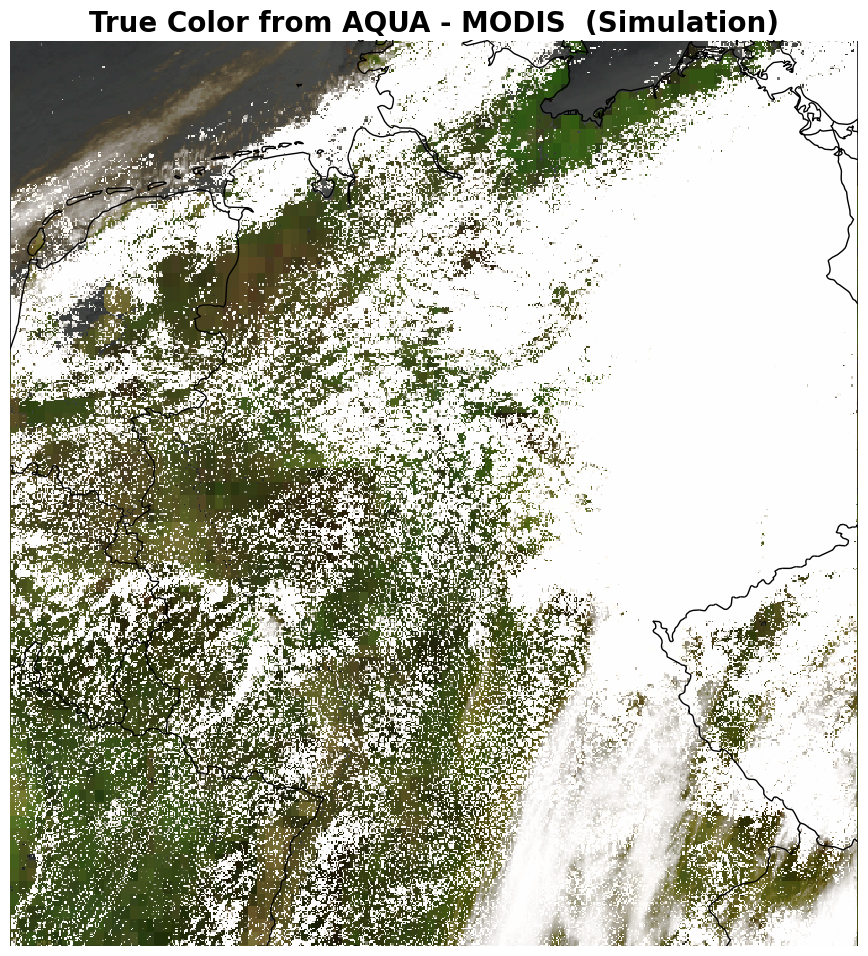

In [3]:
def bytescale(data, cmin=None, cmax=None, high=255, low=0):
    """
    Byte scales an array (image).

    Byte scaling means converting the input image to uint8 dtype and scaling
    the range to ``(low, high)`` (default 0-255).
    If the input image already has dtype uint8, no scaling is done.

    Parameters
    ----------
    data : ndarray
        PIL image data array.
    cmin : scalar, optional
        Bias scaling of small values. Default is ``data.min()``.
    cmax : scalar, optional
        Bias scaling of large values. Default is ``data.max()``.
    high : scalar, optional
        Scale max value to `high`.  Default is 255.
    low : scalar, optional
        Scale min value to `low`.  Default is 0.

    Returns
    -------
    img_array : uint8 ndarray
        The byte-scaled array.

    Examples
    --------
    >>> img = array([[ 91.06794177,   3.39058326,  84.4221549 ],
                     [ 73.88003259,  80.91433048,   4.88878881],
                     [ 51.53875334,  34.45808177,  27.5873488 ]])
    >>> bytescale(img)
    array([[255,   0, 236],
           [205, 225,   4],
           [140,  90,  70]], dtype=uint8)
    >>> bytescale(img, high=200, low=100)
    array([[200, 100, 192],
           [180, 188, 102],
           [155, 135, 128]], dtype=uint8)
    >>> bytescale(img, cmin=0, cmax=255)
    array([[91,  3, 84],
           [74, 81,  5],
           [52, 34, 28]], dtype=uint8)

    """
    if data.dtype == np.uint8:
        return data

    if high < low:
        raise ValueError("`high` should be larger than `low`.")

    if cmin is None:
        cmin = data.min()
    if cmax is None:
        cmax = data.max()

    cscale = cmax - cmin
    if cscale < 0:
        raise ValueError("`cmax` should be larger than `cmin`.")
    elif cscale == 0:
        cscale = 1

    scale = float(high - low) / cscale
    bytedata = (data * 1.0 - cmin) * scale + 0.4999
    bytedata[bytedata > high] = high
    bytedata[bytedata < 0] = 0
    return np.cast[np.uint8](bytedata) + np.cast[np.uint8](low)




def scale_image(image, x, y):
    scaled = np.zeros((along_track, cross_trak), dtype=np.uint8)
    for i in range(len(x)-1):
        x1 = x[i]
        x2 = x[i+1]
        y1 = y[i]
        y2 = y[i+1]
        m = (y2 - y1) / float(x2 - x1)
        b = y2 - (m *x2)
        mask = ((image >= x1) & (image < x2))
        scaled = scaled + mask * np.asarray(m * image + b, dtype=np.uint8)

    mask = image >= x2
    scaled = scaled + (mask * 255)

    return scaled




from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray

from mpl_toolkits.basemap import Basemap

from matplotlib.pyplot import figure 



import cartopy.crs as ccrs
from scipy.interpolate import griddata
from scipy.interpolate.interpnd import _ndim_coords_from_arrays
from scipy.spatial import cKDTree
#################################################################################################################################
# Open the netCDF file
# --------------------

FILE = ("/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-channels-1-to-36-21042022_Reff_test.nc")
# FILE = ("/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to19-26-T12.nc")
output = "/home/jvillarreal/Documents/phd/output"
nc = xarray.open_dataset(FILE)
# Read the variables
# ------------------
lon = nc.variables['lon'][:]           # longitude (degree E)
lat = nc.variables['lat'][:]           # latitude (degree N)
BRF = nc.variables['BRF_total'][:,:,:] # Bi-directional reflectance factors
                                       # equivalent to total (clear+cloudy) top
                                       # of atmosphere radiance output for each
                                   # channel (solar-affected channels only)
# Close the netCDF file
# ---------------------
nc.close()
#################################################################################################################################
# Load the three channels into appropriate R, G, and B variables
# --------------------------------------------------------------


R = BRF[0,9:,:] # MODIS channel 1
G = BRF[3,9:,:] # MODIS channel 4
B = BRF[2,9:,:] # MODIS channel 3




RGB = np.dstack([R, G, B])

print("RGB",np.shape(RGB))


along_track = np.shape(RGB)[0] 
cross_trak = np.shape(RGB)[1] 
z = RGB

rgb = np.zeros((along_track, cross_trak,3))

norme = 0.6#0.4 # factor to increase the brightness ]0,1]

rgb = z / norme

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

z =rgb

z_color_enh = np.zeros((along_track, cross_trak,3), dtype=np.uint8)

x = np.array([0,  30,  60, 120, 190, 255], dtype=np.uint8)
y = np.array([0, 110, 160, 210, 240, 255], dtype=np.uint8)

z_color_enh[:,:,0] = scale_image(bytescale(z[:,:,0]), x, y)
z_color_enh[:,:,1] = scale_image(bytescale(z[:,:,1]), x, y)
z_color_enh[:,:,2] = scale_image(bytescale(z[:,:,2]), x, y)
print( np.max(z_color_enh)  )

z_color_enh = z_color_enh/256
######
# z = z_color_enh/255
# R = z[:,:,0]# MODIS channel 1
# G = z[:,:,1] # MODIS channel 4
# B = z[:,:,2] # MODIS channel 3

# #################################################################################################################################
# # Apply range limits for each channel. RGB values must be between 0 and 1
# # # -----------------------------------------------------------------------
# R = np.clip(R, 0, 1)
# G = np.clip(G, 0, 1)
# B = np.clip(B, 0, 1)
# #################################################################################################################################
# # Apply a gamma correction to the image to control the brightness and make the image not look too dark
# # ----------------------------------------------------------------------------------------------------

# gamma = 1.2 #2.2
# R = np.power(R, 1/gamma)
# G = np.power(G, 1/gamma)
# B = np.power(B, 1/gamma)
# RGB = np.dstack([R, G, B])


# # The final RGB array :)
# RGB = np.dstack([R, G, B])
# z_color_enh= RGB





x = lon
y = lat

data = nc.metpy.parse_cf('BRF_total')

geos = data.metpy.cartopy_crs
# fig = plt.figure(figsize=(15, 12))
fig = figure(num=None, figsize=(15, 12), dpi=100, facecolor = 'white')

# Create axis with Geostationary projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Add the RGB image to the figure. The data is in the same projection as the
# axis we just created.
ax.set_extent([4.5, 14.5, 47.8, 54.5], crs=ccrs.PlateCarree())

# ax.imshow(z, origin='lower',
          # extent=(x.min(), x.max(), y.min(), y.max()), transform= geos)

print( np.max(z_color_enh)  )
ax.imshow(z_color_enh, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()), transform=geos, interpolation='nearest') # 'none'


# Add Coastlines and States
ax.add_feature(ccrs.cartopy.feature.BORDERS, color='black', linewidth=1)
ax.add_feature(ccrs.cartopy.feature.COASTLINE, color='black', linewidth=1)

plt.grid(None) 
plt.box(False)
plt.xticks([])
plt.yticks([])
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
title = 'True Color from AQUA - MODIS  (Simulation)'

plt.title(title, loc='center', fontweight='bold', fontsize=20)

figure_name = '{}/{}_with_Reff.png'.format(output,title) #aca pasarr con todo path

plt.savefig(figure_name, dpi=600, facecolor=fig.get_facecolor())


### with alex reff

In [8]:
nc

<xarray.Dataset>
Dimensions:          (lon: 589, lat: 637, channel: 36)
Coordinates:
  * lon              (lon) float32 4.5 4.517 4.534 4.551 ... 14.46 14.48 14.5
  * lat              (lat) float32 47.5 47.51 47.52 47.53 ... 54.47 54.49 54.5
Dimensions without coordinates: channel
Data variables:
    BRF_total        (channel, lat, lon) float32 ...
    BRF_clear        (channel, lat, lon) float32 ...
    BT_total         (channel, lat, lon) float32 ...
    BT_clear         (channel, lat, lon) float32 ...
    Radiance_total   (channel, lat, lon) float32 ...
    Radiance_clear   (channel, lat, lon) float32 ...
    Radiance_cloudy  (channel, lat, lon) float32 ...
    BRDF             (channel, lat, lon) float32 ...
    Emissivity       (channel, lat, lon) float32 ...
    iwp_ret          (lat, lon) float32 ...
    iwp_model        (lat, lon) float32 ...

In [46]:
import pandas as pd
df = pd.DataFrame(RGB.reshape(-1,3)) 
df.describe()

,0,1,2
count,369892.000000,369892.000000,369892.000000
mean,0.263548,0.264029,0.244359
std,0.247463,0.222616,0.206164
min,0.024432,0.044585,0.061488
25%,0.064499,0.087563,0.078608
50%,0.116619,0.129492,0.117680
75%,0.467394,0.445810,0.416068
max,0.970064,0.915947,0.880152


In [ ]:
369892.000000

In [47]:
637*589

375193

In [42]:
628*589

369892

In [52]:
a =np.array(BRF[:,9:,:].transpose('lat', 'lon','chan'))
print(np.shape(a))  
df2 = pd.DataFrame(a.reshape(-1,20))
df2.describe() #los nan no los cuenta


(628, 589, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000,369892.000000
mean,0.263548,0.449336,0.244359,0.264029,0.403567,0.268879,0.152063,0.227973,0.238402,0.248882,0.260999,0.263861,0.269486,0.271962,0.417265,0.457559,0.364958,0.173083,0.243099,0.022081
std,0.247463,0.206011,0.206164,0.222616,0.188903,0.159868,0.096937,0.169164,0.191896,0.216617,0.221570,0.222288,0.259418,0.263527,0.211116,0.208981,0.174506,0.123411,0.137855,0.044441
min,0.024432,0.022005,0.061488,0.044585,0.010976,0.010548,0.004471,0.069784,0.066702,0.055330,0.051405,0.046628,0.020310,0.017552,0.017820,0.021418,0.017877,0.006772,0.010629,0.000329
25%,0.064499,0.331770,0.078608,0.087563,0.295995,0.167853,0.078178,0.093048,0.084479,0.074494,0.085165,0.087659,0.061149,0.060330,0.287215,0.339025,0.259978,0.093033,0.154675,0.000693
50%,0.116619,0.388555,0.117680,0.129492,0.333699,0.195819,0.105169,0.121299,0.119323,0.116978,0.126596,0.129429,0.115830,0.116365,0.336569,0.396661,0.307512,0.118915,0.187678,0.003407
75%,0.467394,0.589534,0.416068,0.445810,0.533772,0.379552,0.244467,0.369064,0.398623,0.428881,0.443015,0.445658,0.482195,0.488068,0.566924,0.598747,0.491517,0.232819,0.335148,0.016350
max,0.970064,1.030738,0.880152,0.915947,0.885531,0.676670,0.437006,0.794244,0.848734,0.901255,0.913034,0.915811,1.001045,1.011464,1.027283,1.035878,0.983568,0.835430,0.891996,0.298585


RGB (1001, 701, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<function matplotlib.pyplot.show(close=None, block=None)>

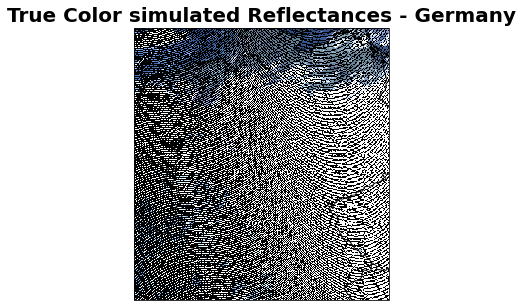

In [7]:
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray

from mpl_toolkits.basemap import Basemap

from matplotlib.pyplot import figure 



import cartopy.crs as ccrs
from scipy.interpolate import griddata
from scipy.interpolate.interpnd import _ndim_coords_from_arrays
from scipy.spatial import cKDTree
modis_file = ("/home/jvillarreal/Documents/phd/dataset/MODIS_Germany_refl_emis_MYD021KM.A2013122.1140.061.2018046032403.nc")
nc_modis = xarray.open_dataset(modis_file)


# ------------------
lon = nc_modis.variables['lon'][:]           # longitude (degree E)
lat = nc_modis.variables['lat'][:]           # latitude (degree N)
BRF = nc_modis.variables['MODIS_Germany_refl_emis'][:,:,:] # Bi-directional reflectance factors
                                       # equivalent to total (clear+cloudy) top
                                       # of atmosphere radiance output for each
                                   # channel (solar-affected channels only)
# Close the netCDF file
# ---------------------
nc_modis.close()
#################################################################################################################################
# Load the three channels into appropriate R, G, and B variables
# --------------------------------------------------------------


R = BRF[0,:,:] # MODIS channel 1
G = BRF[3,:,:] # MODIS channel 4
B = BRF[2,:,:] # MODIS channel 3



RGB = np.dstack([R, G, B])

z = RGB

print("RGB",np.shape(RGB))


along_track = np.shape(RGB)[0] 
cross_trak = np.shape(RGB)[1] 
######
rgb = np.zeros((along_track, cross_trak,3))

norme = 0.3#0.4 # factor to increase the brightness ]0,1]

rgb = z / norme

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

z =rgb


x = lon
y = lat

# data = nc_modis.metpy.parse_cf('MODIS_Germany_refl_emis')

# geos = data.metpy.cartopy_crs
fig = plt.figure(figsize=(5, 5))

# Create axis with Geostationary projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Add the RGB image to the figure. The data is in the same projection as the
# axis we just created.
ax.set_extent([4.5, 14.5, 47.8, 54.5], crs=ccrs.PlateCarree())

# ax.imshow(z, origin='lower',
          # extent=(x.min(), x.max(), y.min(), y.max()), transform= geos)

# ax.imshow(np.fliplr(z) , origin='lower', extent=(x.min(), x.max(), y.min(), y.max()), transform=ccrs.PlateCarree(), interpolation='antialiased') # 'none'
ax.imshow(np.rot90(np.fliplr(z)*2), extent=(x.min(), x.max(), y.min(), y.max()), transform=ccrs.PlateCarree(), origin='lower',  interpolation='nearest')


# Add Coastlines and States
ax.add_feature(ccrs.cartopy.feature.BORDERS, color='black', linewidth=1)
ax.add_feature(ccrs.cartopy.feature.COASTLINE, color='black', linewidth=1)



title = 'True Color simulated Reflectances - Germany'

plt.title(title, loc='center', fontweight='bold', fontsize=20)

plt.savefig("/home/jvillarreal/Documents/phd/output/test_with_gridding_MODIS.png", dpi=600)

plt.show

(1001, 701, 3) (1001, 701)


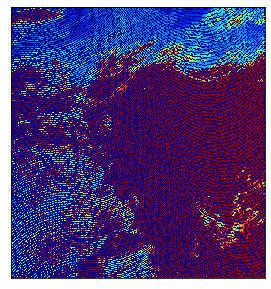

In [38]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(5,5)) 
ax = plt.subplot(111)

m = Basemap(projection='merc', llcrnrlon=4.5, llcrnrlat=47.8, urcrnrlon=14.5,urcrnrlat=54.5, ax=ax, resolution='l')

subset_latitud = lat[:].values
subset_longitude = lon[:].values
print(np.shape(z), np.shape(lon))
data= rgb[:,:,1]  #rgb_out[:,:,1] #[1000:1600,400:1000,1]
a, b = m(subset_longitude, subset_latitud)
cmap=plt.get_cmap('jet') #du bleu au rouge

m.pcolormesh(a,b,data,shading= 'auto',vmin=0, vmax=1, cmap =cmap)
plt.show()



# cs = m.pcolormesh(a,b,data, shading= 'auto',cmap = cmap)
# cbar = fig.colorbar(cs =cs, label ="", ax=ax) #location="right",pad="5%",ticks=[270,275,280,285,290,295,300],

# plt.show()


In [55]:
nc_modis

<xarray.Dataset>
Dimensions:                  (10*nscans:MODIS_SWATH_Type_L1B: 1001, Max_EV_frames:MODIS_SWATH_Type_L1B: 701, bands: 38)
Coordinates:
  * bands                    (bands) float64 1.0 2.0 3.0 4.0 ... 34.0 35.0 36.0
Dimensions without coordinates: 10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B
Data variables:
    lat                      (10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B) float64 ...
    lon                      (10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B) float64 ...
    MODIS_Germany_refl_emis  (bands, 10*nscans:MODIS_SWATH_Type_L1B, Max_EV_frames:MODIS_SWATH_Type_L1B) float64 ...
Attributes:
    title:    MODIS and simulations

RGB (637, 589, 3)


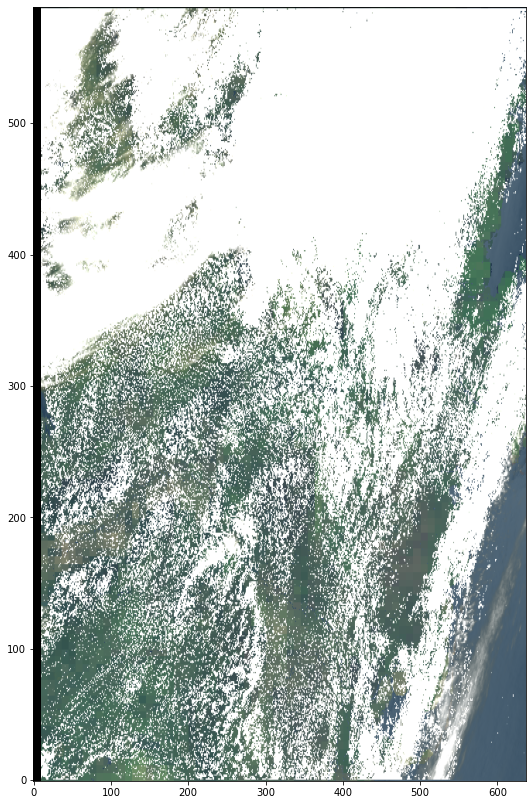

<function matplotlib.pyplot.show(close=None, block=None)>

/home/jvillarreal/miniconda3/envs/modis/lib/python3.8/site-packages/cartopy/mpl/style.py:90: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


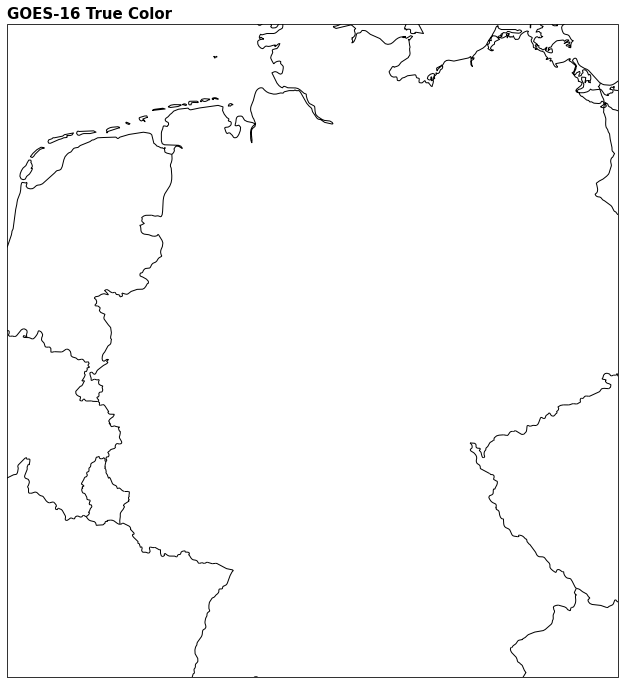

In [12]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
# import metpy
import numpy as np
import xarray

from mpl_toolkits.basemap import Basemap

from matplotlib.pyplot import figure 



import cartopy.crs as ccrs
from scipy.interpolate import griddata
from scipy.interpolate.interpnd import _ndim_coords_from_arrays
from scipy.spatial import cKDTree
#################################################################################################################################
# Open the netCDF file
# --------------------

FILE = ("/home/jvillarreal/Documents/phd/output/output-rttov/rttov-131-channels-1-to-36-21042022_Reff_test.nc")
# FILE = ("/home/jvillarreal/Documents/phd/dataset/MODIS_refl_emis_MYD021KM.A2013122.1140.061.2018046032403.hdf")
nc = xarray.open_dataset(FILE)
# Read the variables
# ------------------
lon = nc.variables['lon'][:]           # longitude (degree E)
lat = nc.variables['lat'][:]           # latitude (degree N)
# BRF = nc.variables['MODIS_Germany_refl_emis'][:,:,:] 
BRF = nc.variables['BRF_total'][:,:,:] # Bi-directional reflectance factors
                                       # equivalent to total (clear+cloudy) top
                                       # of atmosphere radiance output for each
                                   # channel (solar-affected channels only)
# Close the netCDF file
# ---------------------
nc.close()
#################################################################################################################################
# Load the three channels into appropriate R, G, and B variables
# --------------------------------------------------------------
R = BRF[0,:,:] # MODIS channel 1
G = BRF[3,:,:] # MODIS channel 4
B = BRF[2,:,:] # MODIS channel 3

# data_reduced = np.ma.masked_array(data_reduced,  np.isnan(data_reduced))


RGB = np.dstack([R, G, B])
print("RGB",np.shape(RGB))


along_track = np.shape(RGB)[0] 
cross_trak = np.shape(RGB)[1] 

RGB = np.dstack([R, G, B])

z = RGB
# ######
rgb = np.zeros((along_track, cross_trak,3))

norme = 0.22#0.4 # factor to increase the brightness ]0,1]

rgb = z / norme

rgb[ rgb > 1 ] = 1.0
rgb[ rgb < 0 ] = 0.0

z =rgb


x = lon
y = lat


fig = plt.figure(figsize=(30,30))  
# plt.subplots_adjust(hspace=0.2, wspace=0.2)
ax2=plt.subplot(131)
ax2.imshow(np.rot90(np.fliplr(z)), origin='lower', aspect=1.7)
    # plt.title('RGB simulation')
plt.show()


# data = nc.metpy.parse_cf('MODIS_Germany_refl_emis')

# geos = data.metpy.cartopy_crs
fig = plt.figure(figsize=(15, 12))

# Create axis with Geostationary projection
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Add the RGB image to the figure. The data is in the same projection as the
# axis we just created.
ax.set_extent([4.5, 14.5, 47.8, 54.5], crs=ccrs.PlateCarree())

ax.imshow(np.rot90(np.fliplr(z)) , origin='lower',transform=ccrs.PlateCarree())

# Add Coastlines and States
ax.add_feature(ccrs.cartopy.feature.BORDERS, color='black', linewidth=1)
ax.add_feature(ccrs.cartopy.feature.COASTLINE, color='black', linewidth=1)


plt.title('GOES-16 True Color', loc='left', fontweight='bold', fontsize=15)
# plt.title('{}'.format(scan_start.strftime('%d %B %Y %H:%M UTC ')), loc='right')

plt.show





In [11]:
nc

<xarray.Dataset>
Dimensions:          (lon: 589, lat: 637, channel: 36)
Coordinates:
  * lon              (lon) float32 4.5 4.517 4.534 4.551 ... 14.46 14.48 14.5
  * lat              (lat) float32 47.5 47.51 47.52 47.53 ... 54.47 54.49 54.5
Dimensions without coordinates: channel
Data variables:
    BRF_total        (channel, lat, lon) float32 ...
    BRF_clear        (channel, lat, lon) float32 ...
    BT_total         (channel, lat, lon) float32 ...
    BT_clear         (channel, lat, lon) float32 ...
    Radiance_total   (channel, lat, lon) float32 ...
    Radiance_clear   (channel, lat, lon) float32 ...
    Radiance_cloudy  (channel, lat, lon) float32 ...
    BRDF             (channel, lat, lon) float32 ...
    Emissivity       (channel, lat, lon) float32 ...
    iwp_ret          (lat, lon) float32 ...
    iwp_model        (lat, lon) float32 ...

In [1]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import matplotlib.pyplot as plt
import metpy
import numpy as np
import xarray
#################################################################################################################################
# Open the netCDF file
# --------------------

#FILE = ("/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-channels-1-to-36-21042022_Reff_test.nc")
FILE = ("/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to19-26-T12.nc")
nc = xarray.open_dataset(FILE)
# Read the variables
# ------------------
lon = nc.variables['lon'][:]           # longitude (degree E)
lat = nc.variables['lat'][:]           # latitude (degree N)
BRF = nc.variables['bt_refl_total'][:,:,:] # Bi-directional reflectance factors
                                       # equivalent to total (clear+cloudy) top
                                       # of atmosphere radiance output for each
                                   # channel (solar-affected channels only)
# Close the netCDF file
# ---------------------
print(nc)
nc.close()

#################################################################################################################################
# Load the three channels into appropriate R, G, and B variables
# --------------------------------------------------------------
R = BRF[0,:,:] # MODIS channel 1
G = BRF[3,:,:] # MODIS channel 4
B = BRF[2,:,:] # MODIS channel 3
#################################################################################################################################
# Apply range limits for each channel. RGB values must be between 0 and 1
# -----------------------------------------------------------------------
R = np.clip(R, 0, 1)
G = np.clip(G, 0, 1)
B = np.clip(B, 0, 1)
#################################################################################################################################
# Apply a gamma correction to the image to control the brightness and make the image not look too dark
# ----------------------------------------------------------------------------------------------------
gamma = 2.2
R = np.power(R, 1/gamma)
G = np.power(G, 1/gamma)
B = np.power(B, 1/gamma)
#################################################################################################################################
# Combine the three channels with a stacked array, resulting in a color image
# ---------------------------------------------------------------------------
RGB = np.dstack([R, G, B])
#################################################################################################################################
# Plot with cartopy mercator projection
# -------------------------------------
data = nc.metpy.parse_cf('bt_refl_total')
modis = data.metpy.cartopy_crs
x = data.lon
y = data.lat
fig = plt.figure(figsize=(15, 15)) #15, 12
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([4.5, 14.5, 47.8, 54.5], crs=ccrs.PlateCarree())
ax.imshow(RGB, origin='lower', extent=(x.min(), x.max(), y.min(), y.max()), transform=modis, interpolation='antialiased') # 'none'
# ax.coastlines(resolution='50m', color='black', linewidth=0.5)
# ax.add_feature(ccrs.cartopy.feature.COASTLINE, resolution='50m', color='black', linewidth=0.5)
# ax.add_feature(ccrs.cartopy.feature.STATES, linewidth=0.5)
ax.add_feature(ccrs.cartopy.feature.BORDERS, color='black', linewidth=1)
ax.add_feature(ccrs.cartopy.feature.COASTLINE, color='black', linewidth=1)
ax.set_xticks([5., 6., 7., 8., 9., 10., 11., 12., 13., 14.], crs=ccrs.PlateCarree())
ax.set_yticks([48., 49., 50., 51., 52., 53., 54.], crs=ccrs.PlateCarree())
ax.set_xticklabels([5., 6., 7., 8., 9., 10., 11., 12., 13., 14.], color='black', fontsize=16)
ax.set_yticklabels([48., 49., 50., 51., 52., 53., 54.], color='black', fontsize=16)
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# plt.title('Simulated MODIS True Color Image - With Reff', loc='center', fontweight='bold', fontsize=20)
# title = 'Simulated_MODIS_true_color_image_with_reff_read_icon_directly_germany_test.png'



title = 'True Color from AQUA - MODIS (Simulation)'

plt.title(title, loc='center', fontweight='bold', fontsize=20)
#
# ax.coastlines()
output = "/home/jvillarreal/Documents/phd/output"
plt.box(False)

figure_name = '{}/{}.png'.format(output,title) #aca pasarr con todo path
plt.savefig(figure_name, dpi=600)


#plt.savefig(title, format='png', dpi=600)
plt.show()



ModuleNotFoundError: No module named 'pint.unit'